# Pandas for time series

Pandas is very useful for handling time series. 

First we'll need some data. I started at [Diskos](https://portal.diskos.cgg.com/whereoil-data/). It's a bit confusing as there are a lot of places to get data, but I've heard of FactPages so let's start there.

## FactPages... Use pandas to read CSV directly

Right-click and copy URL for CSV from this link:

http://factpages.npd.no/factpages/Default.aspx?culture=nb-no&nav1=field&nav2=TableView|Production|Saleable|Monthly

This file is saved at `https://geocomp.s3.amazonaws.com/data/Norway_field_production_monthly.csv` as well, in case the link breaks.

In [1]:
csv = "https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_production_monthly&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=165.225.35.29&CultureCode=nb-no"

In [2]:
import pandas as pd

df = pd.read_csv(csv)

In [3]:
df.head()

,prfInformationCarrier,prfYear,prfMonth,prfPrdOilNetMillSm3,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,prfPrdOeNetMillSm3,prfPrdProducedWaterInFieldMillSm3,prfNpdidInformationCarrier
0,16/1-12 (Rolvsnes),2021,8,0.00653,0.0,0.0,0.0,0.00653,0.00291,17196400
1,16/1-12 (Rolvsnes),2021,9,0.01053,0.0,0.0,0.0,0.01053,0.00719,17196400
2,16/1-12 (Rolvsnes),2021,10,0.01238,0.0,0.0,0.0,0.01238,0.00912,17196400
3,16/1-12 (Rolvsnes),2021,11,0.01298,0.0,0.0,0.0,0.01298,0.01186,17196400
4,16/1-12 (Rolvsnes),2021,12,0.00461,0.0,0.0,0.0,0.00461,0.00418,17196400


### Exercise

- How many rows are there in this dataframe?
- How many fields are represented? (Look at the column called `'prfInformationCarrier'`)
- How many years of data are there?
- What is the total production?

In [4]:
len(df)

22939

In [5]:
df.describe()

,prfYear,prfMonth,prfPrdOilNetMillSm3,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,prfPrdOeNetMillSm3,prfPrdProducedWaterInFieldMillSm3,prfNpdidInformationCarrier
count,22939.000000,22939.000000,22939.000000,22939.000000,22939.000000,22939.000000,22939.000000,22939.000000,2.293900e+04
mean,2007.195649,6.544357,0.201867,0.121263,0.019802,0.005350,0.348281,0.157318,2.802660e+06
std,10.725395,3.453019,0.388971,0.347924,0.043874,0.028301,0.594375,0.385065,6.539046e+06
min,1971.000000,1.000000,-0.037570,-0.103860,-0.020290,-0.008240,-0.037570,-0.002980,4.343700e+04
25%,2000.000000,4.000000,0.007755,0.000000,0.000000,0.000000,0.032110,0.000000,4.356800e+04
50%,2010.000000,7.000000,0.052530,0.014460,0.001850,0.000000,0.132800,0.005100,4.372500e+04
75%,2016.000000,10.000000,0.225350,0.081670,0.018205,0.000000,0.392705,0.124775,1.630514e+06
max,2021.000000,12.000000,3.453530,3.743890,0.458810,0.462690,4.990650,3.651950,3.854224e+07


In [6]:
df.prfInformationCarrier.unique().size

121

In [7]:
df.prfPrdOeNetMillSm3.sum()

7989.21255

## Rename some columns

### Exercise

Rename some of the columns of the dataframe as follows:

    'prfYear': 'year'
    'prfMonth': 'month'
    'prfInformationCarrier': 'field'
    'prfPrdOilNetMillSm3': 'oil'
    'prfPrdOeNetMillSm3': 'OE'
    'prfPrdProducedWaterInFieldMillSm3': 'water'

In [8]:
columns = {'prfYear': 'year',
           'prfMonth': 'month',
           'prfInformationCarrier': 'field',
           'prfPrdOilNetMillSm3': 'oil',
           'prfPrdOeNetMillSm3': 'OE',
           'prfPrdProducedWaterInFieldMillSm3': 'water',
          }

df = df.rename(columns=columns)

## Add a datetime

We'd like to give this dataframe a **datetime** index with `pandas` datetimes. To do this easily, we need:

- EITHER columns named like `'year'`, `'month'`, `'day'`
- OR a column with a datetime string like `2019-06-30`.

In this dataframe, we have the former, so let's work with that.

### Exercise

- Make a column for the **day**, using a constant like 1.
- Make a datetime column called `'ds'` (for 'date stamp') using `pd.to_datetime()`, passing in a dataframe consisting of the three columns for year, month and the day you just made.
- Finally, to turn the new column into an index, give its name (`'ds'`) to `df.set_index()`.

In [9]:
df['day'] = 1

In [10]:
df[['year', 'month', 'day']].head()

,year,month,day
0,2021,8,1
1,2021,9,1
2,2021,10,1
3,2021,11,1
4,2021,12,1


In [11]:
df['ds'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.set_index('ds')

You should end up with a new dataframe with the `'ds'` column as an index.

In [12]:
df.head()

,field,year,month,oil,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,OE,water,prfNpdidInformationCarrier,day
ds,,,,,,,,,,,
2021-08-01,16/1-12 (Rolvsnes),2021,8,0.00653,0.0,0.0,0.0,0.00653,0.00291,17196400,1
2021-09-01,16/1-12 (Rolvsnes),2021,9,0.01053,0.0,0.0,0.0,0.01053,0.00719,17196400,1
2021-10-01,16/1-12 (Rolvsnes),2021,10,0.01238,0.0,0.0,0.0,0.01238,0.00912,17196400,1
2021-11-01,16/1-12 (Rolvsnes),2021,11,0.01298,0.0,0.0,0.0,0.01298,0.01186,17196400,1
2021-12-01,16/1-12 (Rolvsnes),2021,12,0.00461,0.0,0.0,0.0,0.00461,0.00418,17196400,1


## Simplify the dataframe

Before we carry on, let's simplify the dataframe a bit, reducing it to a few columns: **field**, **water**, **other**, and **oil** (the order is a slightly cheaty way to get the colours I want on the charts, without having to fiddle with them).

In [13]:
df['other'] = df.OE - df.oil
df = df.drop('OE', axis=1)
df = df[['field', 'water', 'other', 'oil']]

In [14]:
df.head()

,field,water,other,oil
ds,,,,
2021-08-01,16/1-12 (Rolvsnes),0.00291,0.0,0.00653
2021-09-01,16/1-12 (Rolvsnes),0.00719,0.0,0.01053
2021-10-01,16/1-12 (Rolvsnes),0.00912,0.0,0.01238
2021-11-01,16/1-12 (Rolvsnes),0.01186,0.0,0.01298
2021-12-01,16/1-12 (Rolvsnes),0.00418,0.0,0.00461


## Time series with `pandas`

`pandas` knows all about time series. So we can easily make a time series plot:

<AxesSubplot:xlabel='ds'>

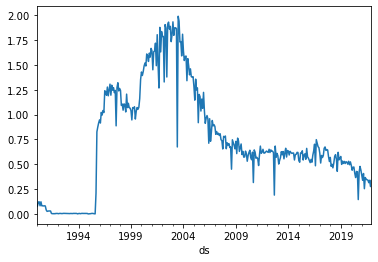

In [15]:
df.oil[df.field=='TROLL'].plot()

We can easily stretch it out, or add other lines:

<AxesSubplot:xlabel='ds'>

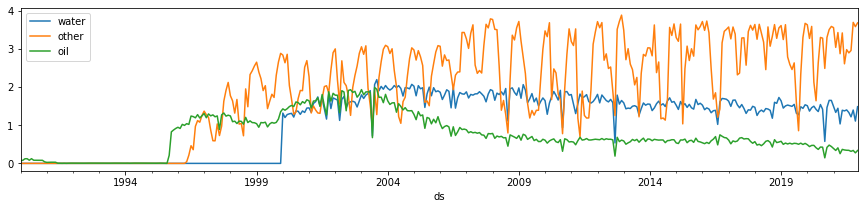

In [16]:
df[df.field=='TROLL'].plot(figsize=(15, 3))

Let's make a dataframe of only the TROLL field.

In [17]:
troll = df[df.field=='TROLL']

Now we can slice using natural dates:

<AxesSubplot:xlabel='ds'>

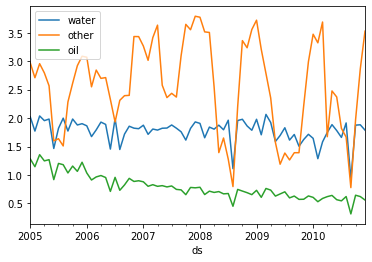

In [18]:
troll['2005':'2010'].plot()

<AxesSubplot:xlabel='ds'>

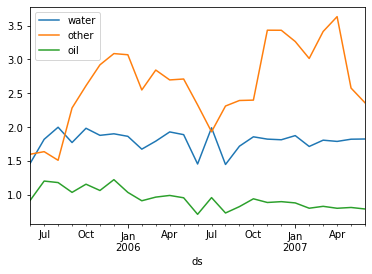

In [19]:
troll['Jun 2005':'Jun 2007'].plot()

Try to imagine doing that in Excel!

Let's get the summed annual production for the Troll field:

In [20]:
troll.loc['2010':'2018'].resample('Y').sum()

,water,other,oil
ds,,,
2010-12-31,19.98388,29.62816,6.86951
2011-12-31,19.84282,25.72520,7.26407
2012-12-31,18.96438,35.81799,7.10043
2013-12-31,17.76114,30.86865,7.09666
2014-12-31,18.74376,30.27524,7.29758
2015-12-31,18.33253,35.97052,7.01422
2016-12-31,17.62508,33.15294,7.34828
2017-12-31,18.02677,38.21186,7.24393
2018-12-31,17.17168,40.03591,6.41034


Throw `.plot()` on the end:

<AxesSubplot:xlabel='ds'>

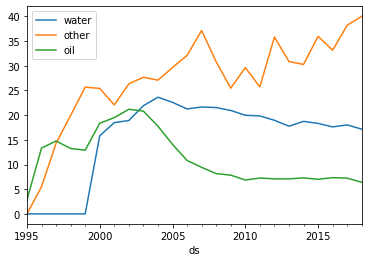

In [21]:
troll.loc['1995':'2018'].resample('Y').sum().plot()

Or we can get totals for *ALL* fields in the database:

<AxesSubplot:xlabel='ds'>

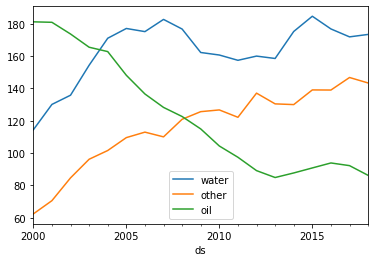

In [22]:
df.loc['2000':'2018'].resample('Y').sum().plot()

Let's look at the contribution TROLL made to NCS production since 1993:

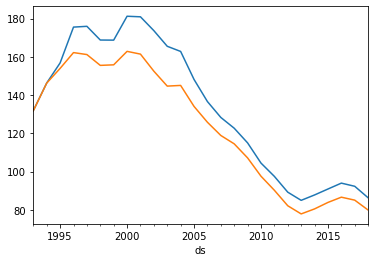

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.loc['1993':'2018', 'oil'].resample('Y').sum().plot(ax=ax)
df.loc[df.field!='TROLL'].loc['1993':'2018', 'oil'].resample('Y').sum().plot(ax=ax)
plt.show()

----

Looking for forecasting? Head over to...

### [Machine learning time series](Machine_learning_time_series.ipynb)

## Add operators

There's also a list of operators here >> https://factpages.npd.no/factpages/Default.aspx?culture=nb-no&nav1=field&nav2=TableView%7cProduction%7cSaleable%7cMonthly

This file is also in `/data`, but we can read directly from the web with `pandas`, as before:

In [24]:
url = "https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_operator_hst&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=165.225.35.29&CultureCode=nb-no"
dg = pd.read_csv(url)

In [25]:
dg.head()

,fldName,cmpLongName,fldOperatorFrom,fldOperatorTo,fldNpdidField,cmpNpdidCompany,fldOperatorDateUpdated,datesyncNPD
0,ALBUSKJELL,Phillips Petroleum Company Norway,25.04.1975,22.10.2002,43437,694,03.10.2019,03.03.2022
1,ALBUSKJELL,ConocoPhillips Norge,23.10.2002,31.03.2003,43437,2144081,03.10.2019,03.03.2022
2,ALBUSKJELL,Phillips Petroleum Norsk AS,01.04.2003,05.05.2003,43437,705,03.10.2019,03.03.2022
3,ALBUSKJELL,ConocoPhillips Skandinavia AS,06.05.2003,NaN,43437,2410696,03.10.2019,03.03.2022
4,ALVE,Statoil ASA (old),16.03.2007,30.09.2007,4444332,1622484,03.10.2019,03.03.2022


In [26]:
dg['from'] = pd.to_datetime(dg.fldOperatorFrom)
dg['to'] = pd.to_datetime(dg.fldOperatorTo)
dg['to'] = dg['to'].fillna(pd.to_datetime('today'))

In [27]:
dg.head()

,fldName,cmpLongName,fldOperatorFrom,fldOperatorTo,fldNpdidField,cmpNpdidCompany,fldOperatorDateUpdated,datesyncNPD,from,to
0,ALBUSKJELL,Phillips Petroleum Company Norway,25.04.1975,22.10.2002,43437,694,03.10.2019,03.03.2022,1975-04-25,2002-10-22 00:00:00.000000
1,ALBUSKJELL,ConocoPhillips Norge,23.10.2002,31.03.2003,43437,2144081,03.10.2019,03.03.2022,2002-10-23,2003-03-31 00:00:00.000000
2,ALBUSKJELL,Phillips Petroleum Norsk AS,01.04.2003,05.05.2003,43437,705,03.10.2019,03.03.2022,2003-01-04,2003-05-05 00:00:00.000000
3,ALBUSKJELL,ConocoPhillips Skandinavia AS,06.05.2003,NaN,43437,2410696,03.10.2019,03.03.2022,2003-06-05,2022-03-03 15:06:34.046455
4,ALVE,Statoil ASA (old),16.03.2007,30.09.2007,4444332,1622484,03.10.2019,03.03.2022,2007-03-16,2007-09-30 00:00:00.000000


Let's get the operator of each field, for each month, and put it in our production dataframe.

There is probably a more elegant way to do this with `join` or `merge` or something... but I can't figure it out.

In [30]:
import numpy as np

def process_row(row):
    """
    Process a row in df to get the operator at that time.
    
    Note that 'name' is a special attribute for the current index.
    """
    this_df = dg.loc[dg.fldName==row.field, :]
    record = this_df.loc[(dg['from'] < row.name) & (row.name <= dg['to']), "cmpLongName"]
    if any(record.values):
        return record.values[0]
    else:
        return np.nan

In [31]:
df['operator'] = df.apply(process_row, axis=1)

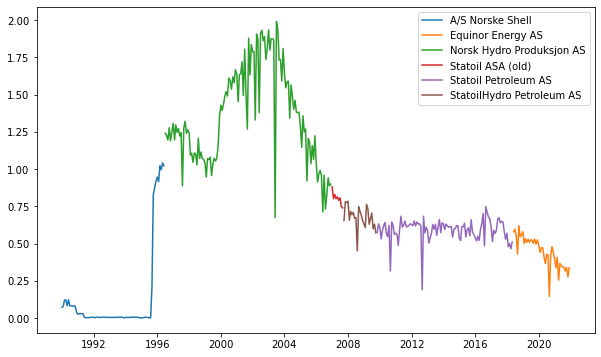

In [32]:
plt.figure(figsize=(10,6))
for name, group in df[df.field=='TROLL'].groupby('operator'):
    plt.plot(group.oil, label=name)
plt.legend()

----

&copy; 2022 Agile Scientific, licensed CC-BY